In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

## 1.Data Importing and Cleaning:

In [2]:
# Step 1: Data Importing and Cleaning
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

#Display the head of the dataset
print(df.head())

    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         Fals

In [3]:
# Display the tail of the dataset
print(df.tail())

          neo_id        name  absolute_magnitude  estimated_diameter_min  \
338194  54403809  (2023 VS4)              28.580                0.005112   
338195  54415298  (2023 XW5)              28.690                0.004859   
338196  54454871  (2024 KJ7)              21.919                0.109839   
338197  54456245   (2024 NE)              23.887                0.044377   
338198  54460573  (2024 NH3)              22.951                0.068290   

        estimated_diameter_max orbiting_body  relative_velocity  \
338194                0.011430         Earth       56646.985988   
338195                0.010865         Earth       21130.768947   
338196                0.245607         Earth       11832.041031   
338197                0.099229         Earth       56198.382733   
338198                0.152700         Earth       42060.357830   

        miss_distance  is_hazardous  
338194   6.406548e+07         False  
338195   2.948883e+07         False  
338196   5.346078e+07     

In [4]:
#display null values and data types
#Display information about the dataset
print(df.info())
# Display a description of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None
             neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+0

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [6]:
# Remove null values
df.dropna(inplace=True)

In [7]:
# Check duplicate values
df.duplicated().sum()
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

neo_id    33511
dtype: int64

In [9]:
df.sample(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
229264,3446396,(2009 CT5),18.60,0.506471,1.132505,Earth,142579.431941,4.502373e+07,False
218253,3767326,(2017 BL92),20.88,0.177237,0.396315,Earth,72155.047798,5.104877e+07,False
93647,3892802,(2019 VH5),23.24,0.059780,0.133672,Earth,62561.236519,3.165183e+07,False
303419,3771021,(2017 EE3),26.00,0.016771,0.037501,Earth,25947.426694,1.544167e+07,False
246564,3654519,(2013 XZ21),20.54,0.207279,0.463490,Earth,92239.110477,4.613258e+07,False


## 2.Exploratory Data Analysis (EDA):

In [12]:
# Step 2: Exploratory Data Analysis (EDA)
# Perform EDA using visualization libraries like Matplotlib and Seaborn

# Explore data distribution and correlations using pairplot
#sns.pairplot(data, hue="is_hazardous")
#plt.show()

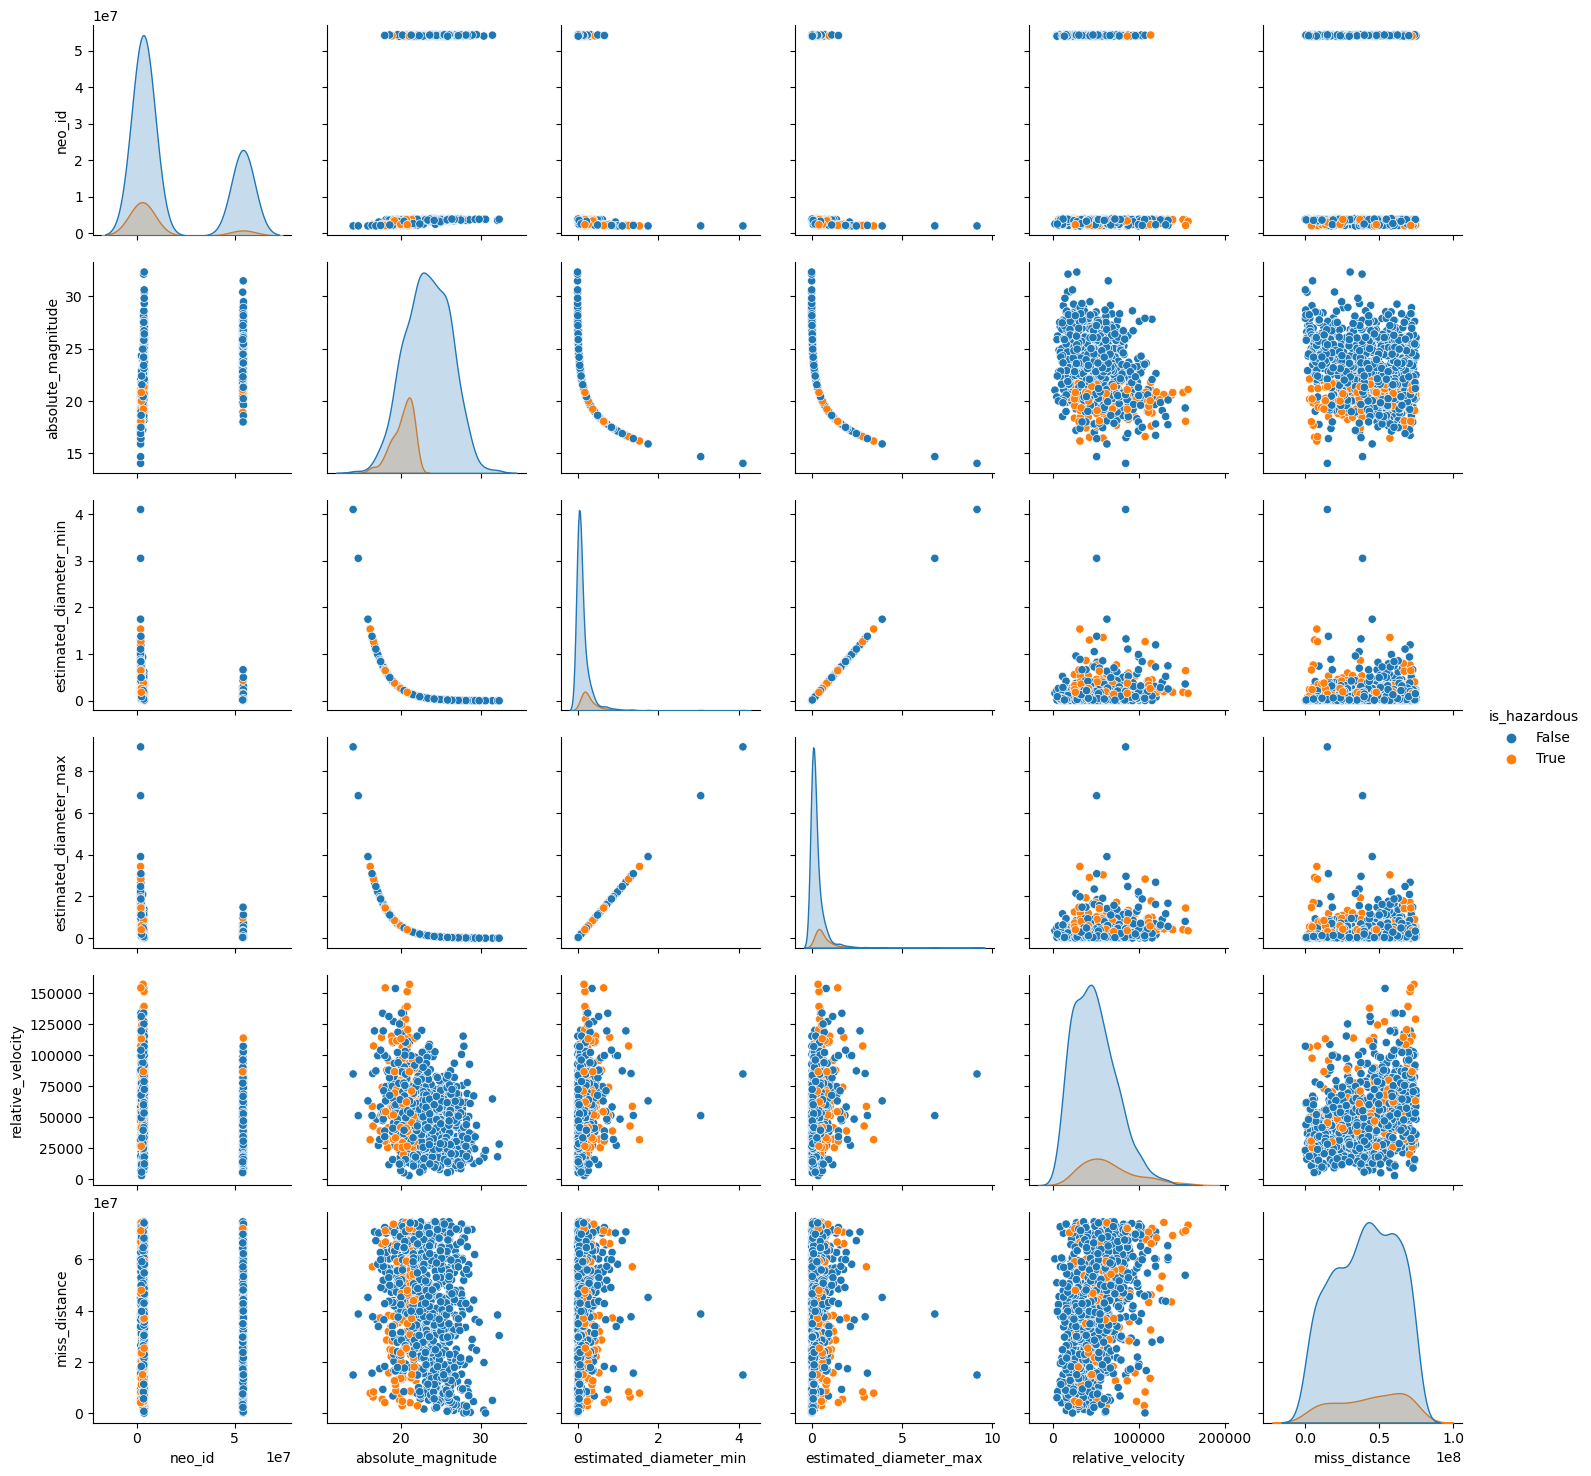

In [18]:
# Load a sample of the dataset for faster processing
data_sample = df.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Select numerical features for pairplot
numerical_features = data_sample.select_dtypes(include=[np.number])

# Pairplot with a subset of numerical features
sns.pairplot(data_sample, vars=numerical_features.columns, hue="is_hazardous")
plt.show()

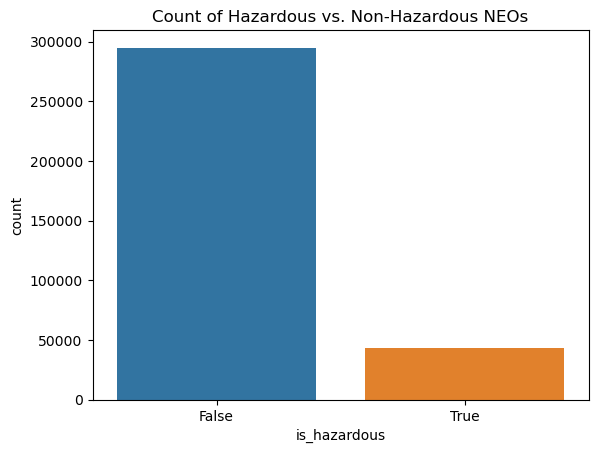

In [19]:
# Visualize the count of hazardous vs. non-hazardous NEOs
sns.countplot(x="is_hazardous", data=df)
plt.title("Count of Hazardous vs. Non-Hazardous NEOs")
plt.show()

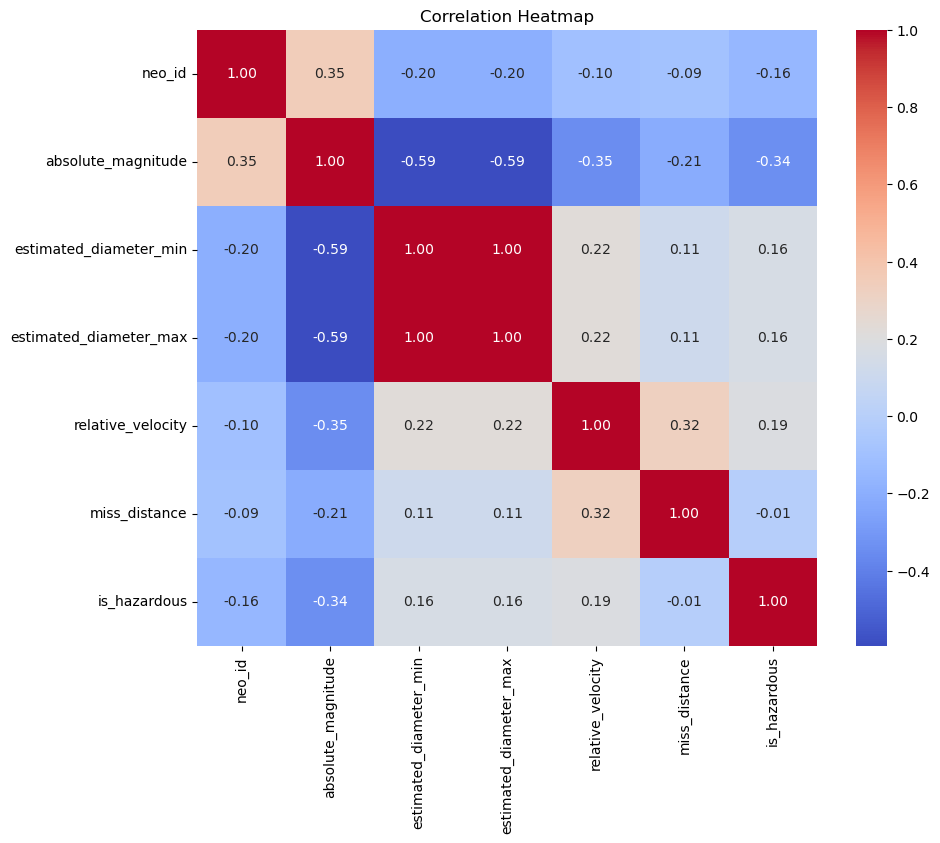

In [20]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 3.Data Preprocessing:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


# Feature selection
selected_features = ['absolute_magnitude', 'relative_velocity']
X = df[selected_features]
y = df['is_hazardous']

# Encoding categorical variables if any
# Normalizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling Imbalanced Classes
data_majority = df[df['is_hazardous'] == 0]
data_minority = df[df['is_hazardous'] == 1]

# Oversampling the minority class to match the majority class
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)

# Combine the upsampled minority class with the majority class
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Split the data into training and testing sets
X_balanced = data_balanced[selected_features]
y_balanced = data_balanced['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Use X_train, y_train for training the model and X_test, y_test for evaluating the model

## 4.Model Training and Evaluation:

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Print classification report
print(classification_report(y_test, y_pred))

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {roc_auc}')

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     59046
        True       0.92      1.00      0.96     58958

    accuracy                           0.96    118004
   macro avg       0.96      0.96      0.96    118004
weighted avg       0.96      0.96      0.96    118004

Precision: 0.9192245809706797
Recall: 0.998100342616778
F1-Score: 0.9570400487904046
AUC-ROC: 0.9935793207054183
